Prendere in considerazione i dati caricati precedentemente e quelli relativi ai corsi d'acqua della provincia di Milano allegati al presente post. Realizzare poi un notebook che:

In [ ]:
!pip install geopandas
!pip install contextily

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import contextily

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

1. Visualizzi su una mappa i 10 corsi d'acqua più lunghi della provincia di Milano

In [ ]:
corsi_acqua = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Geopandas - Materiale esercizi/Corsi_acqua_Piano_di_Gestione.zip')
corsi_acqua

In [5]:
province = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Geopandas - Materiale esercizi/Limiti01012021_g/ProvCM01012021_g')

In [40]:
prov_milano = province[province["DEN_UTS"]=="Milano"]

In [ ]:
corsi_milano = corsi_acqua[corsi_acqua.within(prov_milano.geometry.squeeze())]
corsi_milano # corsi d'acqua nella provincia di Milano

In [ ]:
corsi_l = corsi_milano.nlargest(10,"SHAPE_LEN")
corsi_l # corsi d'acqua più lunghi della provincia di Milano

In [11]:
ax = corsi_l.to_crs(epsg=3857).plot(figsize= (20, 20), facecolor="none", edgecolor="b", linewidth=3)
prov_milano.to_crs(epsg=3857).plot(ax=ax, facecolor="y", alpha=0.5, linewidth=4, edgecolor="k")
contextily.add_basemap(ax=ax)

Output hidden; open in https://colab.research.google.com to view.

2. Visualizzi su una mappa i Navigli e i fiumi da cui prendono l'acqua. Utilizzare colori diversi per rappresentare i navigli rispetto ai fiumi ed evidenziare bene i percorsi sulla mappa

In [12]:
navigli = corsi_acqua[corsi_acqua["NOME"].str.contains("Navigl")]

In [13]:
fiumi = corsi_acqua[corsi_acqua.intersects(navigli.geometry.squeeze().unary_union)]

In [14]:
fiumi = fiumi[~fiumi["NOME"].str.contains("Navigl")]

In [16]:
ax = prov_milano.to_crs(epsg=3857).plot(figsize=(20, 20), facecolor="y", alpha=0.5, linewidth=4, edgecolor="k")
navigli.to_crs(epsg=3857).plot(ax=ax, linewidth=4, edgecolor="r")
fiumi.to_crs(epsg=3857).plot(ax=ax, linewidth=4, edgecolor="b")
contextily.add_basemap(ax=ax)

Output hidden; open in https://colab.research.google.com to view.

3. Visualizzi su una mappa i corsi d'acqua che passano in un comune inserito dall'utente

In [42]:
comuni = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Geopandas - Materiale esercizi/Limiti01012021_g/Com01012021_g')

Inserisci un comune: Cormano
Corsi d'acqua che attraversano il comune di        COD_RIP  ...                                           geometry
1853        1  ...  POLYGON ((513324.450 5044373.750, 513413.918 5...

[1 rows x 13 columns] : 
 28    Seveso (Torrente)
Name: NOME, dtype: object


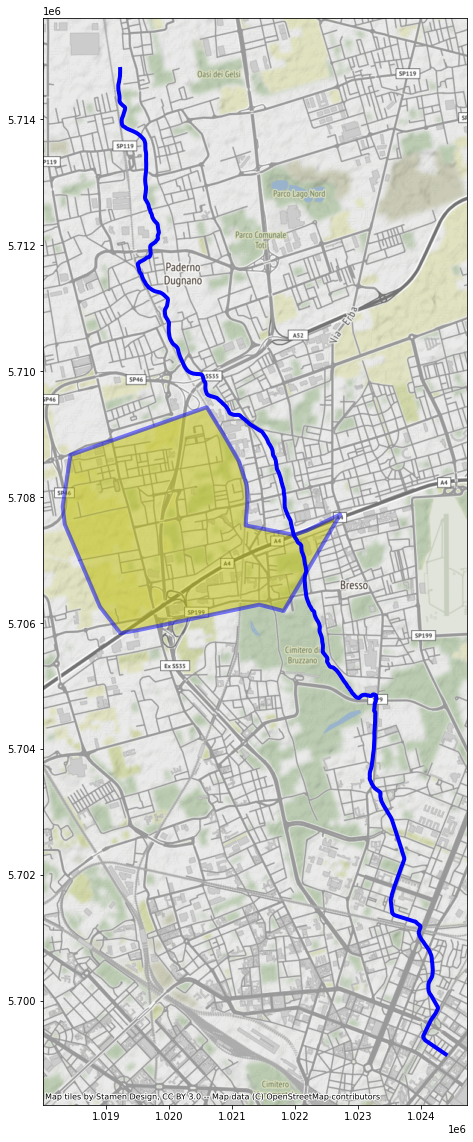

In [44]:
n_comune = input("Inserisci un comune: ")
comune = comuni[comuni["COMUNE"] == n_comune]
squeeze_comune = comune.geometry.squeeze()
corsi_attraver = corsi_acqua[corsi_acqua.intersects(squeeze_comune)]
corsi_attraver
print("Corsi d'acqua che attraversano il comune di ", comune, ": \n", corsi_attraver.NOME)
ax = comune.to_crs(epsg=3857).plot(figsize=(20, 20), facecolor="y", alpha = 0.5, edgecolor="b", linewidth=4)
corsi_attraver.to_crs(epsg=3857).plot(ax=ax, linewidth=4, edgecolor="b")
contextily.add_basemap(ax=ax)

4. Visualizzi su una mappa un fiume inserito dall'utente con tutti i comuni  che attraversa. Se attraversa Milano, visualizzare solo i quartieri che attraversa

In [29]:
quartieri_milano = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Geopandas - Materiale esercizi/ds964_nil_wm.zip')

In [ ]:
n_fiume = input("Inserire il nome di un fiume: ")
fiume = corsi_acqua[corsi_acqua["NOME"] == n_fiume]
squeeze_fiume = fiume.geometry.squeeze()
comuni_attraversati = comuni[comuni.intersects(squeeze_fiume)]
# if comuni_attraversati.contains(quartieri_milano):
  # quartieri_milano
# else:
comuni_attraversati
ax = fiume.to_crs(epsg=3857).plot(figsize=(20, 20), edgecolor="b", linewidth=4)
comuni_attraversati.to_crs(epsg=3857).plot(ax=ax, facecolor="y", alpha=0.5, edgecolor="k", linewidth=4)
contextily.add_basemap(ax=ax)

5. Visualizzi il numero di corsi d'acqua della provincia di Milano e la lunghezza totale di tutti i corsi d'acqua

In [ ]:
print("Numero corsi d'acqua della provincia di Milano: ", corsi_milano.count())
lun_corsi_milano = corsi_milano.length
print("Lunghezza totale di tutti i corsi d'acqua: ", lun_corsi_milano)

6. Visualizzi su una mappa i comuni della provincia di Milano che non sono attraversati da corsi d'acqua

In [ ]:
comuni_milano = comuni[comuni.within(prov_milano.geometry.squeeze())]
comuni_milano

In [ ]:
corsi_squeeze = corsi_acqua.geometry.squeeze()

In [ ]:
corsi_union = corsi_squeeze.unary_union

In [ ]:
comuni_no_corsi = comuni_milano[~comuni_milano.intersects(corsi_union)]
comuni_no_corsi

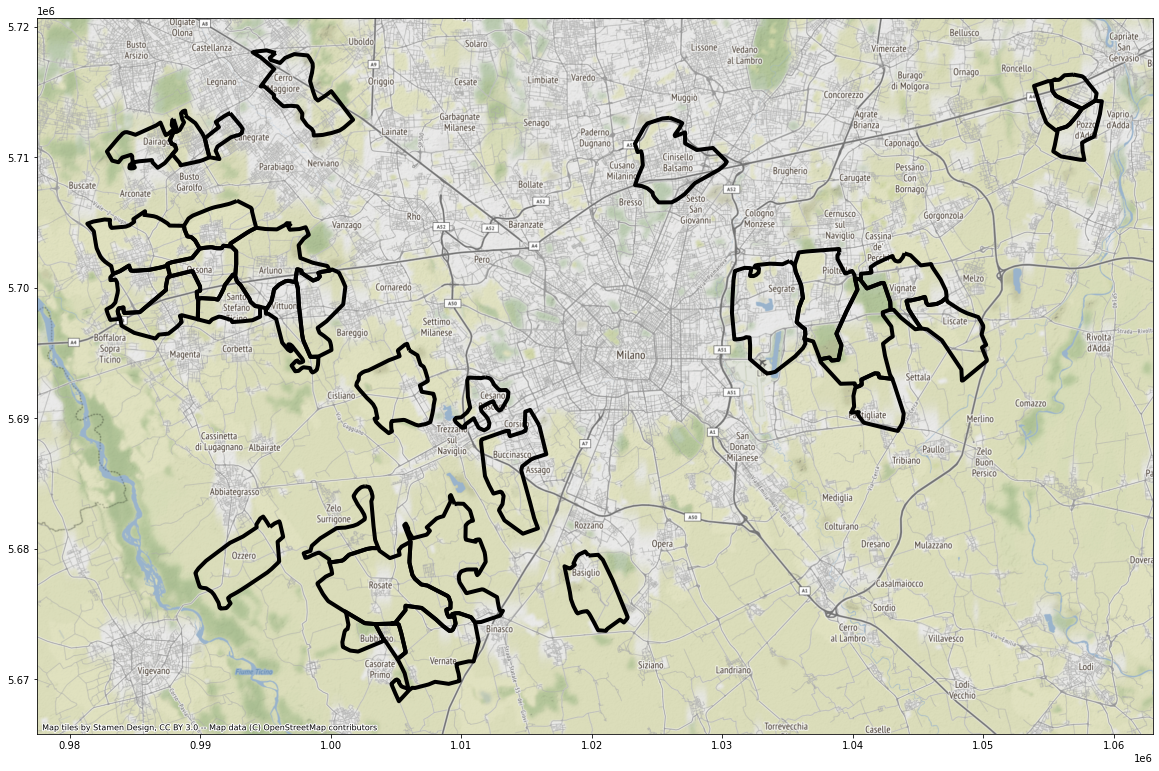

In [ ]:
ax = comuni_no_corsi.to_crs(epsg=3857).plot(figsize= (20, 20), facecolor="none", edgecolor="k", linewidth=4)
contextily.add_basemap(ax=ax)